# Social data analysis: Wiki articles
## Author: Ainur Baikara
### In collaboration with Grayson (Wen Guangxue)
### Subject: Social Computing

In [625]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [563]:
col_names = ("Article", "rev_id", "page_id", "user", "timestamp")
articles = pd.read_csv("articles.csv")
data_sc = pd.read_csv("data_sc.csv", names = col_names)
data_talk = pd.read_csv("data_talk.csv", names = col_names)

In [564]:
data_sc.count()

Article      81436
rev_id       81436
page_id      81436
user         81435
timestamp    81436
dtype: int64

## here are some preprocessing I have made to before analysing the data 

In [565]:
articles.head()

,#,Article,Quality
0,1,Parallel computing,FA
1,2,Manchester Mark 1,FA
2,3,NeXT,FA
3,4,Delrina,FA
4,5,Folding@home,FA


In [566]:
data_sc.head()

,Article,rev_id,page_id,user,timestamp
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z


In [567]:
data_sc.describe()

,rev_id,page_id
count,8.143600e+04,8.143600e+04
mean,3.007017e+08,9.843718e+05
std,2.470983e+08,4.407455e+06
min,1.620000e+02,2.277000e+04
25%,7.955608e+07,3.567300e+04
50%,2.618288e+08,4.379200e+04
75%,4.551194e+08,2.081570e+05
max,8.697927e+08,3.834571e+07


In [568]:
data_sc.count()

Article      81436
rev_id       81436
page_id      81436
user         81435
timestamp    81436
dtype: int64

In [569]:
data_talk.count()

Article      2352
rev_id       2352
page_id      2352
user         2352
timestamp    2352
dtype: int64

In [570]:
add_data_sc = pd.merge(data_sc, articles[['Article', 'Quality']], on='Article')
add_data_sc.tail()

,Article,rev_id,page_id,user,timestamp,Quality
81431,Numerical control,329692,35607,Christopher Mahan,2002-09-01T18:56:02Z,C
81432,Numerical control,189209,35607,LA2,2002-03-04T15:02:03Z,C
81433,Numerical control,22998,35607,Chris_mahan,2002-03-04T14:56:50Z,C
81434,Numerical control,22992,35607,Conversion script,2002-02-25T15:43:11Z,C
81435,Numerical control,300398,35607,Clasqm,2001-10-21T20:23:33Z,C


In [571]:
add_data_talk = pd.merge(data_talk, articles[['Article', 'Quality']], on='Article')
add_data_talk.tail()

,Article,rev_id,page_id,user,timestamp,Quality
2347,Nomogram,224010916,18320284,ShepBot,2008-07-06T22:46:28Z,C
2348,Non-standard RAID levels,395371595,18320287,John Hill,2010-11-07T16:33:41Z,C
2349,Non-standard RAID levels,224010931,18320287,ShepBot,2008-07-06T22:46:31Z,C
2350,Numerical control,224010942,7323516,ShepBot,2008-07-06T22:46:34Z,C
2351,Numerical control,79892669,7323516,SkerHawx,2006-10-06T18:53:09Z,C


In [572]:
def f(row):
    if row['Quality'] == 'A':
        val = 'Good'
    elif row['Quality'] == 'GA':
        val = 'Good'
    elif row['Quality'] == 'FA':
        val = 'Good'
    else:
        val = 'NotSoGood'
    return val

In [574]:
articles['type'] = articles.apply(f, axis=1)
add_data_talk['article_type'] = add_data_talk.apply(f, axis=1)
add_data_sc['article_type'] = add_data_sc.apply(f, axis=1)

In [575]:
add_data_sc.count()

Article         81436
rev_id          81436
page_id         81436
user            81435
timestamp       81436
Quality         81436
article_type    81436
dtype: int64

In [576]:
sl1 = pd.DataFrame(add_data_sc.loc[add_data_sc['article_type'] == 'Good'])
sl2 = pd.DataFrame(add_data_sc.loc[add_data_sc['article_type'] == 'NotSoGood'])
print(sl1.count())
print(sl2.count())

Article         39165
rev_id          39165
page_id         39165
user            39164
timestamp       39165
Quality         39165
article_type    39165
dtype: int64
Article         42271
rev_id          42271
page_id         42271
user            42271
timestamp       42271
Quality         42271
article_type    42271
dtype: int64


In [577]:
sl1 = pd.DataFrame(sl1.user).drop_duplicates()
sl2 = pd.DataFrame(sl2.user).drop_duplicates()
print(sl1.count())
print(sl2.count())

user    13103
dtype: int64
user    4033
dtype: int64


I have got two dataframes: 
* articles revision data
* talk revision data
Total number of unique editors for articles revision dataset follows: 
* Good articles: 13103 unique editors out of 39165 possible which is about 34 per cent 
* NotSoGood articles: 4033 unique editors out of 42271 possible which is about 9.5 per cent
This 

In [578]:
add_data_sc.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


In [579]:
sc_good = add_data_sc[add_data_sc.article_type == 'Good']
sc_bad = add_data_sc[add_data_sc.article_type == 'NotSoGood']

In [580]:
talk_good = add_data_talk[add_data_talk.article_type == 'Good']
talk_bad = add_data_talk[add_data_talk.article_type == 'NotSoGood']

# Task 1: Total number of unique editors
## My Hypothesis: 
* I guess the total number of editors would be higer for Good article, while I can get the less number of editors for not so good articles. I am making this hypothesis because I believe that the more unique users collaborate in the article the better the quality. 

In [614]:
task1_good = sc_good.groupby(["Article"])["user"].nunique().reset_index(name="count")
task1_good = pd.merge(task1_good, sc_good[['Article', 'Quality']], on='Article')
task1_good.drop_duplicates()

,Article,count,Quality
0,4chan,1167,FA
2037,AACS encryption key controversy,8,GA
2047,AVG PC TuneUp,14,GA
2070,Acid2,779,FA
3407,Alan Kotok,50,GA
3473,Alan Turing,62,GA
3558,Allocator (C++),16,GA
3577,Anonymous (group),25,A
3610,Apple Inc. litigation,15,GA
3629,Apple TV,15,GA


In [615]:
task1_good.describe()

,count
count,39165.000000
mean,1127.865901
std,896.158767
min,4.000000
25%,122.000000
50%,1197.000000
75%,1727.000000
max,2817.000000


In [616]:
task1_bad = sc_bad.groupby(["Article"])["user"].nunique().reset_index(name="count")
task1_bad = pd.merge(task1_bad, sc_bad[['Article', 'Quality']], on='Article')
task1_bad.drop_duplicates()

,Article,count,Quality
0,2016 Dyn cyberattack,85,C
163,3dfx Interactive,111,C
385,64-bit computing,102,C
573,ACM SIGHPC,92,C
736,ACM SIGOPS,89,C
893,ARM big.LITTLE,107,C
1106,ARPANET,120,C
1336,ASCII,92,C
1507,Aakash (tablet),167,C
1793,Ada (programming language),86,C


In [617]:
task1_bad.describe()

,count
count,42271.000000
mean,100.388801
std,42.893194
min,67.000000
25%,83.000000
50%,91.000000
75%,101.000000
max,385.000000


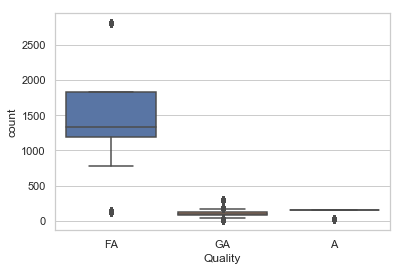

In [627]:
sb.boxplot( y='count', x='Quality', data=task1_good)

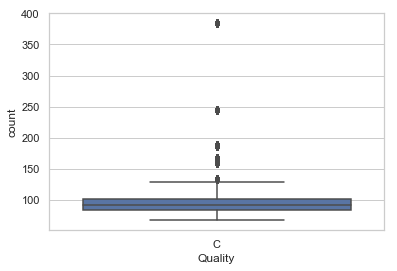

In [628]:
sb.boxplot( y='count', x='Quality', data=task1_bad)

I wanted to check the outliers of those dataframes: 

Here are some observations: 

* outliers in the good article have crazy number of contributors. So I have got the question:
* I have some assumptions about those outliers:  

- the outliers in the Good articles have a lot of contributors as those articles were mostly the first in their kinds: what I mean is that  Manchester Baby was the world's first electronic stored-program computer that must have been 'hot' topic and a lot of people wanted to contribute 

- could be also because of the analymous contributos who might be chaging their ip addresses


# Task 2: Number of edits per editors
## My Hypothesis: 
* the more the number of edits the better the quality of the article. Because if the user wants to improve his/her contribution why will probably come back and edit the page again or they might want fix their mistakes
* good articles tend to have more edits as there are a lot  of people who care about the certain article 

In [418]:
sc_good.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


In [425]:
task2_good = sc_good.groupby(['Article','user']).agg({'rev_id': ['nunique']})
task2_good.describe()

,rev_id
,nunique
count,22530.000000
mean,1.738304
std,3.230359
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,162.000000


In [426]:
task2_good.head()

rev_id
                       nunique
Article user                  
4chan   #NAME?               1
        1.36.143.145         1
        1007D                1
        103.250.134.31       1
        103.255.7.39         1

In [427]:
task2_bad = sc_bad.groupby(['Article', 'user']).agg({'rev_id': ['nunique']})
task2_bad.describe()

,rev_id
,nunique
count,23387.000000
mean,1.807457
std,1.980297
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,44.000000


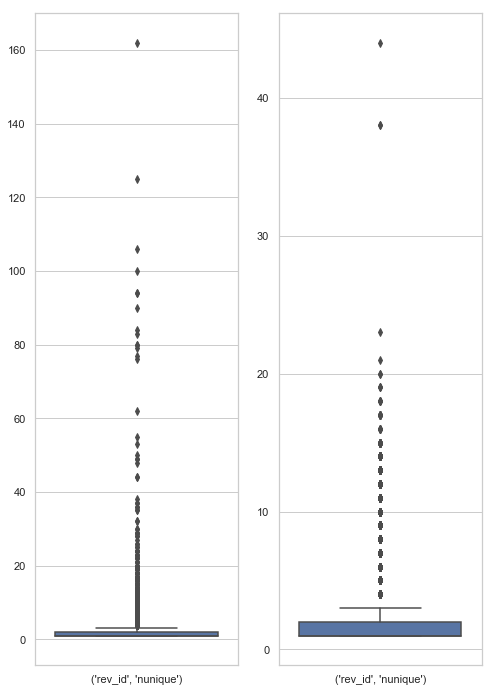

In [428]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( x=data=task2_good,   ax=axes[0])
sb.boxplot( data=task2_bad,  ax=axes[1])


### The boxplot on the left represent the "Good" article, and the boxpplot on the right represent the NotSoGood article. 

| ... | Good articles | NotSoGoodArticles |
| --- | --- | --- |
| Median | 45 | 90 |
| Standard deviation | 376 | 26 |
 
 Good articles have higher standard devition which make them less predictable. 
 I am presenting those boxplots without considering the outliers; I have added them in the next step

In [446]:
task2_good2 = sc_good.groupby(['Article', 'user']).agg('rev_id').describe()['count']
task2_good2.sort_values(ascending = False)
task2_good2[task2_good2>10]

Article                              user           
4chan                                22dragon22burn     13.0
                                     Anton Mravcek      18.0
                                     Arthur Rubin       94.0
                                     ClueBot            11.0
                                     ClueBot NG         32.0
                                     Dale Arnett        15.0
                                     Dicklyon           24.0
                                     PolarYukon         12.0
                                     PrimeFan           15.0
                                     Tophet             17.0
Acid2                                24.27.1.122        14.0
                                     Arthur Rubin       53.0
                                     Blah42b10          12.0
                                     ClueBot NG         22.0
                                     Dale Arnett        17.0
                                

In [ ]:
# task2_good1 = pd.Series(task2_good.sort_values(ascending=False))
# task2_good1[task2_good1>4]

In [ ]:
task2_bad1 = sc_good.groupby(['Article','user']).agg({'rev_id': ['nunique']})
task2_bad1.sort_values(ascending = False).head(10)
task2_bad1[task2_bad1>4]

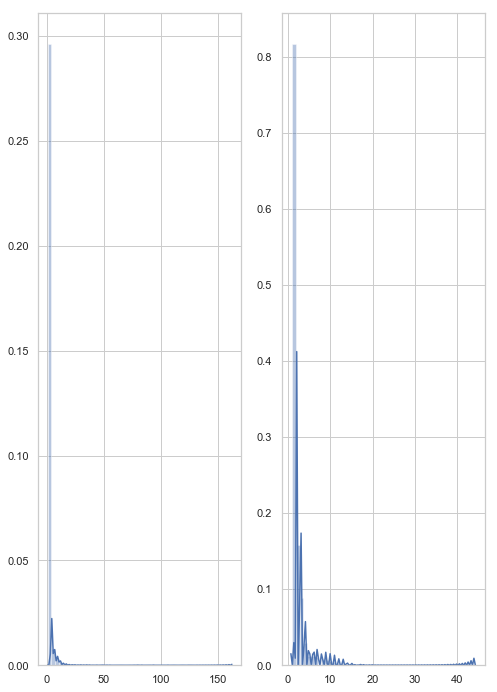

In [410]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.distplot(task2_good, ax=axes[0])
sb.distplot(task2_bad, ax=axes[1])

Discussion: 

# Task 3: Number of talk-page posts
## My Hypothesis: 
* total number of unique editors for good articles would be less than for NotSoGood articles, because I think that a lot 

In [412]:
talk_bad.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
1637,ACM SIGHPC,767714637,18319938,Johnsoniensis,2017-02-27T14:56:27Z,C,NotSoGood
1638,ACM SIGHPC,224007826,18319938,ShepBot,2008-07-06T22:32:40Z,C,NotSoGood
1639,ACM SIGOPS,767728421,18319940,Johnsoniensis,2017-02-27T16:33:35Z,C,NotSoGood
1640,ACM SIGOPS,224007836,18319940,ShepBot,2008-07-06T22:32:43Z,C,NotSoGood
1641,Alan Kay,767735440,18319942,Johnsoniensis,2017-02-27T17:21:23Z,C,NotSoGood


In [ ]:
task3_good = talk_good.groupby(['Article']).agg({'rev_id': ['count']})
task3_good.describe()

In [ ]:
task3_bad = talk_bad.groupby(['Article']).agg({'rev_id': ['count']})
task3_bad.describe()

In [ ]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task3_good,   ax=axes[0], showfliers=False)
sb.boxplot( data=task3_bad,  ax=axes[1], showfliers = False)
plt.show()

### The boxplot on the left represent the "Good" article, and the boxpplot on the right represent the NotSoGood article. 

| ... | Good articles | NotSoGoodArticles |
| --- | --- | --- |
| Median | 45 | 90 |
| Standard deviation | 376 | 26 |
 
 Good articles have higher standard devition which make them less predictable. 
 I am presenting those boxplots without considering the outliers; I have added them in the next step

In [ ]:
task1_good1 = sc_good.groupby('Article').agg('user').describe()['unique']
task1_good1.sort_values(ascending = False)
task1_good1[task1_good1>200]

In [ ]:
task1_bad1 = sc_bad.groupby('Article').agg('user').describe()['unique']
task1_bad1.sort_values(ascending = False).head(10)
task1_bad1[task1_bad1>120]

In [ ]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.distplot(task1_good, ax=axes[0])
sb.distplot(task1_bad, ax=axes[1])

# Task 4: Number of editors posting on talk-pages
## My Hypothesis: 
* total number of unique editors for good articles would be less than for NotSoGood articles, because I think that a lot 
form a hypotheses in connection to article quality; (2) present the comparison between two group of articles using average and standard deviation as well as box plots.

In [174]:
task4_good_talk = talk_good.groupby(['Article']).agg({'user': ['count']})
task4_good_talk.describe()

sc_good = add_data_sc[add_data_sc.article_type == 'Good']
sc_bad = add_data_sc[add_data_sc.article_type == 'NotSoGood']
task1_good = sc_good.groupby(['Article','user']).agg({'rev_id': ['nunique']})
task1_good.describe()

,user
,count
count,152.000000
mean,10.769737
std,35.204318
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,265.000000


In [179]:
task1_bad = sc_bad.groupby(['Article']).agg({'user': ['nunique']})
task1_bad.describe()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,850357480,22173,WOSlinker,2018-07-15T11:19:09Z,FA,Good
1,Parallel computing,844288857,22173,Arthur Rubin (alternate),2018-06-03T23:33:14Z,FA,Good
2,Parallel computing,807179335,22173,Arkansalty,2017-10-26T11:59:51Z,FA,Good
3,Parallel computing,791405619,22173,JFG,2017-07-20T01:58:52Z,FA,Good
4,Parallel computing,791405528,22173,JFG,2017-07-20T01:58:00Z,FA,Good
5,Parallel computing,791398051,22173,Certes,2017-07-20T00:32:10Z,FA,Good
6,Parallel computing,791392318,22173,S≈Çawomir Bia≈Çy,2017-07-19T23:55:49Z,FA,Good
7,Parallel computing,791389948,22173,Volunteer1234,2017-07-19T23:33:40Z,FA,Good
8,Parallel computing,785782581,22173,Certes,2017-06-15T11:39:59Z,FA,Good
9,Parallel computing,781500946,22173,Certes,2017-05-21T16:33:39Z,FA,Good


In [180]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task1_good_sc,   ax=axes[0], showfliers=False)
sb.boxplot( data=task1_bad_sc,  ax=axes[1], showfliers = False)
plt.show()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
1637,ACM SIGHPC,767714637,18319938,Johnsoniensis,2017-02-27T14:56:27Z,C,NotSoGood
1638,ACM SIGHPC,224007826,18319938,ShepBot,2008-07-06T22:32:40Z,C,NotSoGood
1639,ACM SIGOPS,767728421,18319940,Johnsoniensis,2017-02-27T16:33:35Z,C,NotSoGood
1640,ACM SIGOPS,224007836,18319940,ShepBot,2008-07-06T22:32:43Z,C,NotSoGood
1641,Alan Kay,767735440,18319942,Johnsoniensis,2017-02-27T17:21:23Z,C,NotSoGood
1642,Alan Kay,224007848,18319942,ShepBot,2008-07-06T22:32:47Z,C,NotSoGood
1643,Automata theory,767858834,18319943,Johnsoniensis,2017-02-28T10:35:07Z,C,NotSoGood
1644,Automata theory,224007857,18319943,ShepBot,2008-07-06T22:32:50Z,C,NotSoGood
1645,Bit,767900831,18319945,Johnsoniensis,2017-02-28T16:36:04Z,C,NotSoGood
1646,Bit,224007873,18319945,ShepBot,2008-07-06T22:32:53Z,C,NotSoGood


### The boxplot on the left represent the "Good" article, and the boxpplot on the right represent the NotSoGood article. 

| ... | Good articles | NotSoGoodArticles |
| --- | --- | --- |
| Median | 45 | 90 |
| Standard deviation | 376 | 26 |
 
 Good articles have higher standard devition which make them less predictable. 
 I am presenting those boxplots without considering the outliers; I have added them in the next step

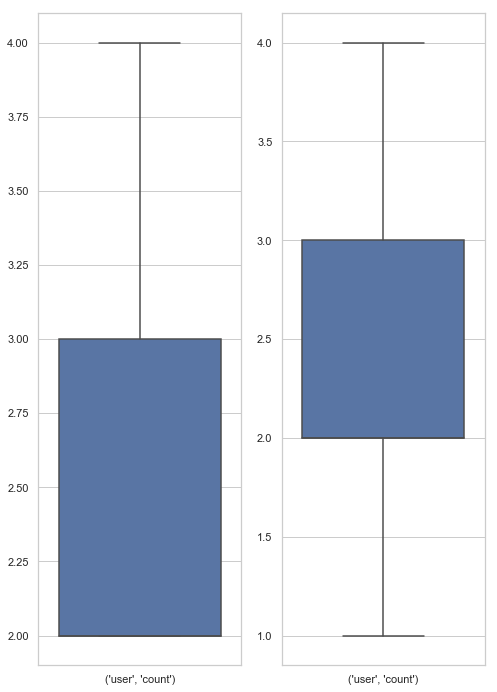

In [177]:
task1_good1 = sc_good.groupby('Article').agg('user').describe()['unique']
task1_good1.sort_values(ascending = False)
task1_good1[task1_good1>200]

In [ ]:
task1_bad1 = sc_bad.groupby('Article').agg('user').describe()['unique']
task1_bad1.sort_values(ascending = False).head(10)
task1_bad1[task1_bad1>120]

In [ ]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.distplot(task1_good, ax=axes[0])
sb.distplot(task1_bad, ax=axes[1])

# Task 5: Frequency of edits (time between edits)
## My Hypothesis: 
* the lower the frequency the lower the quality 

In [368]:
sc_good.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


In [356]:
sc_bad.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
39165,ACM SIGHPC,865335155,35483,82.19.214.105,2018-10-23T08:25:16Z,C,NotSoGood
39166,ACM SIGHPC,840607020,35483,Certes,2018-05-10T23:14:29Z,C,NotSoGood
39167,ACM SIGHPC,824408972,35483,2405:204:A02B:DF9B:9D3D:8121:CE8D:20A1,2018-02-07T04:05:31Z,C,NotSoGood
39168,ACM SIGHPC,823252418,35483,Timmyshin,2018-01-31T03:42:53Z,C,NotSoGood
39169,ACM SIGHPC,805567256,35483,Lds,2017-10-16T06:25:49Z,C,NotSoGood


In [374]:
task5_good = pd.DataFrame(sc_good.groupby('Article').agg('timestamp').unique())
# task5_good

In [390]:
def measure_freq(article_name):
    tt = task5_good.loc[article_name]
    tt.loc['timestamp']
    task5 = pd.Series([pd.Timestamp(i) for i in tt.loc['timestamp']])
    task5 = task5.sort_values()
    return task5.diff().astype('timedelta64[s]').mean()

In [392]:
task5_new = pd.DataFrame([{"Article": row.name, 'N': measure_freq(row.name)} for index, row  in task5_good.iterrows()])
task5_new

,Article,N
0,4chan,2.451807e+05
1,AACS encryption key controversy,1.895115e+07
2,AVG PC TuneUp,6.864113e+06
3,Acid2,3.684713e+05
4,Alan Kotok,5.924646e+06
5,Alan Turing,4.292272e+06
6,Allocator (C++),8.145039e+06
7,Anonymous (group),1.098173e+07
8,Apple Inc. litigation,9.181976e+06
9,Apple TV,9.545517e+06


In [415]:
task5_new.describe()

,N
count,1.520000e+02
mean,9.967647e+06
std,1.075210e+07
min,9.803746e+04
25%,2.856659e+06
50%,5.504580e+06
75%,1.443341e+07
max,4.889858e+07


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a40fe6470>]],
      dtype=object)

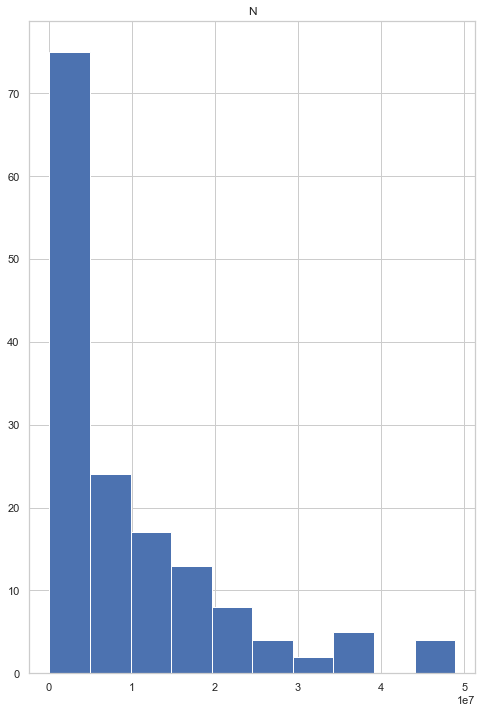

In [394]:
task5_new.hist(column='N')

In [398]:
task5_bad = pd.DataFrame(sc_bad.groupby('Article').agg('timestamp').unique())
def measure_freq(article_name):
    tt = task5_bad.loc[article_name]
    tt.loc['timestamp']
    task5 = pd.Series([pd.Timestamp(i) for i in tt.loc['timestamp']])
    task5 = task5.sort_values()
    return task5.diff().astype('timedelta64[s]').mean()
task5_new_bad = pd.DataFrame([{"Article": row.name, 'N': measure_freq(row.name)} for index, row  in task5_bad.iterrows()])
task5_new_bad.head()

,Article,N
0,2016 Dyn cyberattack,3.167014e+06
1,3dfx Interactive,2.396185e+06
2,64-bit computing,2.798104e+06
3,ACM SIGHPC,3.244638e+06
4,ACM SIGOPS,3.277835e+06


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a41494470>]],
      dtype=object)

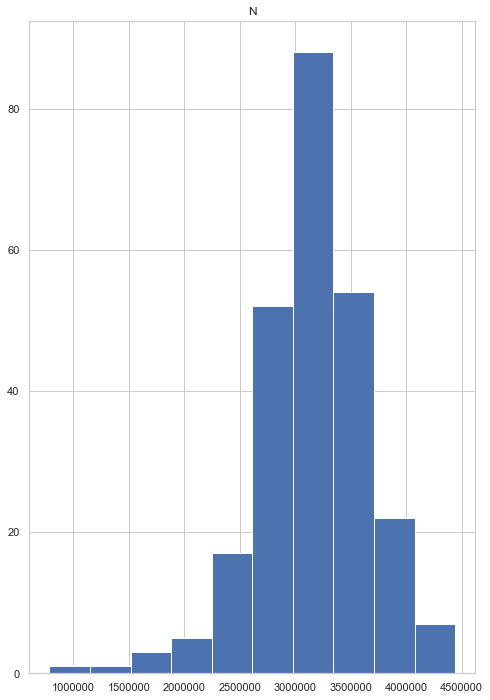

In [399]:
task5_new_bad.hist(column='N')

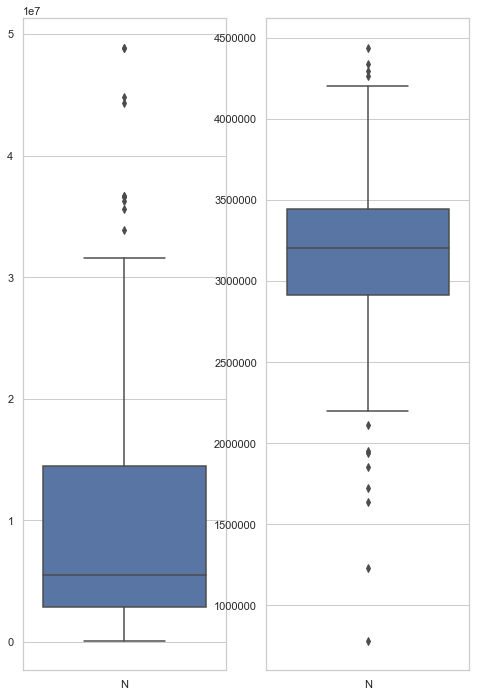

In [400]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task5_new,   ax=axes[0])
sb.boxplot( data=task5_new_bad,  ax=axes[1])